In [100]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [48]:
bold = np.loadtxt('../data/50003_timeseries.txt')
bold_bin = np.zeros(bold.shape)
bold_bin[np.where(bold>=0)] = 1
bold_bin[np.where(bold<0)] = -1
n_rois = bold_bin.shape[1]
n_timesteps = bold_bin.shape[0]

In [6]:
beta = 1
state = bold_bin
state.shape

(196, 116)

In [120]:
# globals
def loss(J, s):
    term1 = 0
    term2 = 0
    for t in range(n_timesteps):
        C = beta * J @ s[t].T
        term1 += C @ s[t].T
        term2 -= np.sum(np.log(np.exp(C) + np.exp(-C)))
    return (term1+term2)/n_timesteps

def gradient(J, s):
    grad = 0
    for t in range(n_timesteps):
        C = beta * J @ s[t].T
        grad += s[t].T @ s[t] - np.tanh(C).T @ s[t]
    return grad * beta/n_timesteps

In [141]:
def gradient_ascent(max_iterations,threshold,w_init,
                     obj_func,grad_func,extra_param = [],
                     learning_rate=1,momentum=0.8):
    
    w = w_init
    w_history = [w]
    f_history = [obj_func(w,extra_param)]
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while  i<max_iterations:
        delta_w = learning_rate*grad_func(w,extra_param)
        w = w+delta_w
        
        # store the history of w and f
        w_history.append(w)
        f_history.append(obj_func(w,extra_param))
        
        # update iteration number and diff between successive values
        # of objective function
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
    
    return w_history,f_history

In [142]:
J = np.random.uniform(0, 1, size=(n_rois, n_rois))
J = (J + J.T)/2 # making it symmetric
np.fill_diagonal(J, 1)
print(J.shape)
start = timeit.default_timer()

#Your statements here

J_hist, f_hist = gradient_descent(100, 0.05, J, loss, gradient, extra_param=bold_bin)
stop = timeit.default_timer()
print(stop - start)

(116, 116)
1.8556964999997945


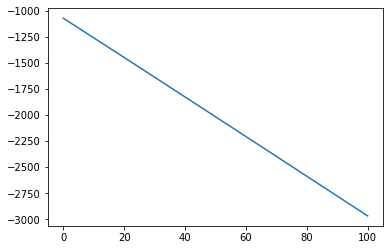

In [143]:
plt.plot(f_hist)

In [140]:
J = np.random.uniform(0, 1, size=(n_rois, n_rois))
J = (J + J.T)/2 # making it symmetric
np.fill_diagonal(J, 1)
loss(J, bold_bin)


-1070.3998064754962

In [101]:
fc = 1/n_timesteps * bold_bin.T @ bold_bin

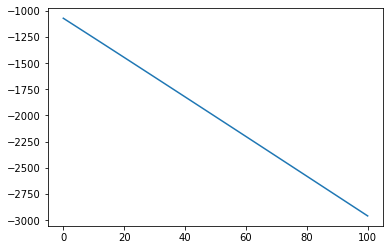

In [125]:
corr = []
for i in J_hist:
    corr.append(loss(i, bold_bin))
#     c = np.corrcoef(np.triu(fc).flatten(), np.triu(i).flatten())[0, 1]
#     corr.append(c)
plt.plot(corr)